In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False

In [3]:
df3 = pd.read_excel('./data/saleinfo_month.xls')
df3.head()

,series,manufacture,cartype,brand,carclass,carlevel,carprice,stat_month,quantity,revenue,profit
0,德系,北京奔驰,SUV,奔驰,奔驰GLA,紧凑,33,202001,8002,264066,60735.2
1,德系,北京奔驰,SUV,奔驰,奔驰GLC,中型,49,202001,10535,516215,92918.7
2,德系,北京奔驰,轿车,奔驰,奔驰C级,中型,41,202001,13087,536567,144873.0
3,德系,北京奔驰,轿车,奔驰,奔驰E级,中大型,53,202001,9133,484049,91969.3
4,德系,华晨宝马,SUV,宝马,宝马X1,紧凑,36,202001,6823,245628,58950.7


In [5]:
#不同车系销量分析
data5=df3.groupby('series').agg({'quantity': 'sum'})
data5

,quantity
series,
德系,4512136
日系,3676204
法系,519700
美系,2702707
自主,4559809
韩系,1899212


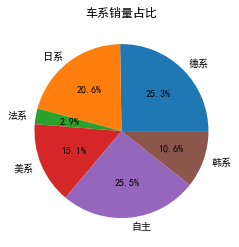

In [6]:
regions =data5.index
sales = data5['quantity']
# 饼图
plt.pie(sales, labels=regions, autopct='%1.1f%%')
# 图表标题
plt.title('车系销量占比')
# 显示图表
plt.show()

In [8]:
data = df3.groupby(['cartype','carlevel']).agg({'revenue':'mean'}).unstack()
data

revenue                                             \
carlevel             中型            中大型             小型           微型   
cartype                                                              
SUV       187613.083333   17349.346154   93258.033708          NaN   
轿车        166161.560284  464462.982456  106642.198198  6784.384615   

                         
carlevel             紧凑  
cartype                  
SUV       209080.365079  
轿车        126682.546529

In [11]:
data.fillna(0,inplace = True)
data

revenue                                             \
carlevel             中型            中大型             小型           微型   
cartype                                                              
SUV       187613.083333   17349.346154   93258.033708     0.000000   
轿车        166161.560284  464462.982456  106642.198198  6784.384615   

                         
carlevel             紧凑  
cartype                  
SUV       209080.365079  
轿车        126682.546529

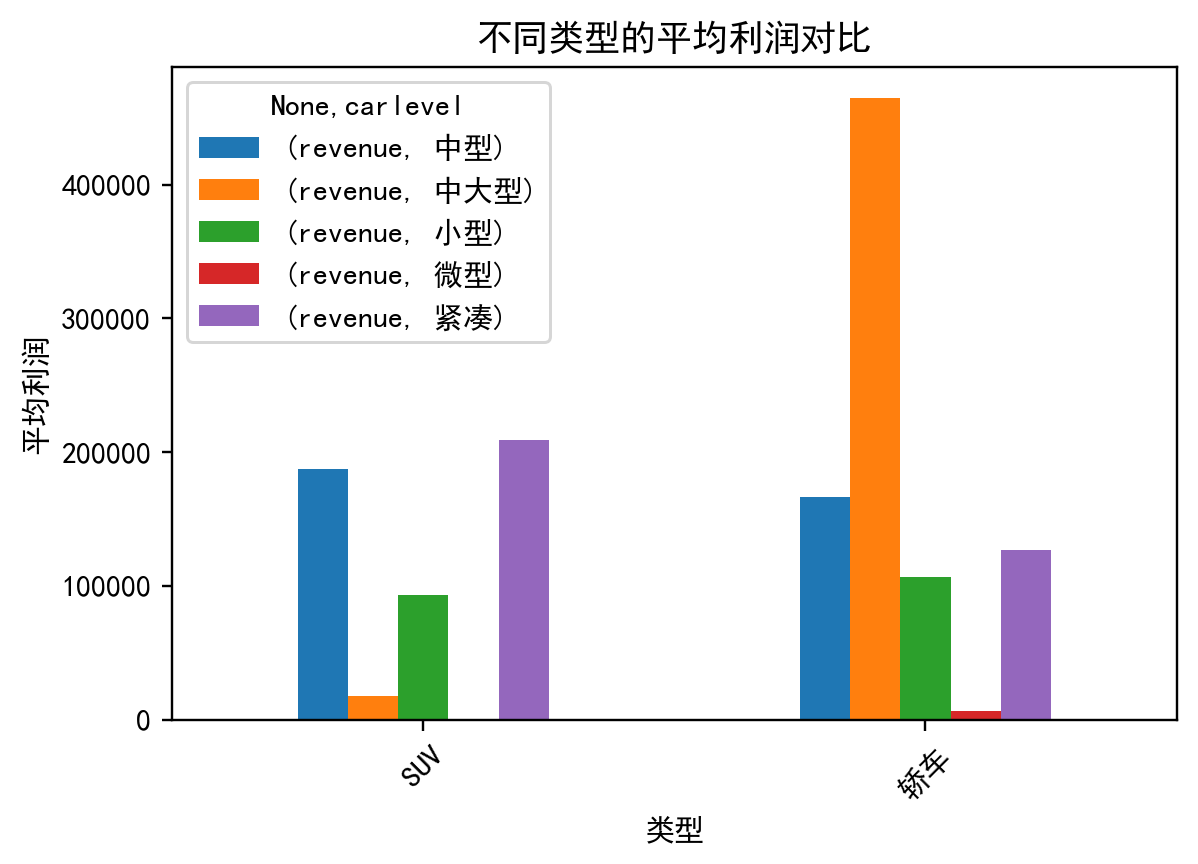

In [13]:
data.plot(kind='bar')
plt.title('不同类型的平均利润对比')
plt.xlabel('类型')
plt.ylabel('平均利润')
plt.xticks(rotation = 45)
plt.show()